In [34]:
import backtrader as bt
from datetime import datetime, date
import pandas_datareader as pdr
import yfinance as yf
import pyfolio

import matplotlib

In [33]:
yf.pdr_override()
spy_df = pdr.get_data_yahoo("SPY", start=datetime(2006, 1, 1), end=datetime(2018, 12, 31))

In [47]:
cerebro = bt.Cerebro()

In [42]:
# cerebro.addanalyzer(bt.analyzers.Calmar)
# cerebro.addanalyzer(bt.analyzers.PyFolio)
# cerebro.addanalyzer(bt.analyzers.SharpeRatio_A)
# cerebro.addanalyzer(bt.analyzers.SQN)
# cerebro.addanalyzer(bt.analyzers.VWR)

In [43]:
# cerebro.addobserver(bt.observers.TimeReturn, timeframe=bt.TimeFrame.Days)

# # add APY as benchmark
# SPY = bt.feeds.PandasData(dataname=spy_df)
# cerebro.addobserver(bt.observers.Benchmark, data=SPY, timeframe=bt.TimeFrame.Days)

In [48]:
class Strategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        # sef.sma50 = self.observer()

    def next(self):
        pass
        # Simply log the closing price of the series from the reference
        # self.log(f'Close, {self.dataclose[0]}')

cerebro.addstrategy(Strategy)

0

In [49]:
XOM = bt.feeds.Quandl(
    dataname='XOM',
    fromdate=datetime(2006, 1, 1),
    todate=datetime(2018, 12, 31),
    apikey="FCKwjHdhEA4rnMXk4ykY"
)

cerebro.adddata(XOM)

AAPL = bt.feeds.Quandl(
    dataname='AAPL',
    fromdate=datetime(2006, 1, 1),
    todate=datetime(2018, 12, 31),
    apikey="FCKwjHdhEA4rnMXk4ykY"
)

cerebro.adddata(AAPL)

In [50]:
print(f'Starting Portfolio Value: {cerebro.broker.getvalue()}')

results = cerebro.run()

print(f'Final Portfolio Value: {cerebro.broker.getvalue()}')

Starting Portfolio Value: 10000.00
[<backtrader.feeds.quandl.Quandl object at 0x7fb62b27aba8>, <backtrader.feeds.quandl.Quandl object at 0x7fb62b27ae80>]
Final Portfolio Value: 10000.00


In [16]:
results

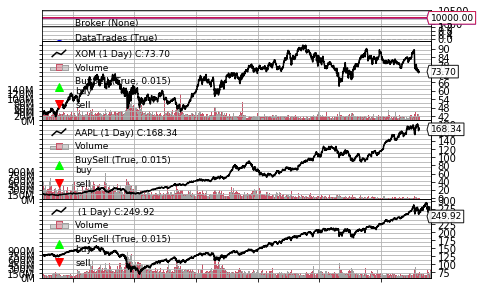

[[<Figure size 432x288 with 8 Axes>]]

In [25]:
%matplotlib inline
cerebro.plot(iplot=False)

In [29]:
%matplotlib inline
strat = results[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()

pyfolio.create_full_tear_sheet(
    returns,
    positions=positions,
    transactions=transactions,
    live_start_date='2016-01-01',  # This date is sample specific
    round_trips=True
)

IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
SPY = pdr.get_data_yahoo("SPY", start=datetime(2006, 1, 1), end=date.today())